# K Nearest Neighbor Classification

In [2]:
import pandas as pd

path = '../datasets/Frogs_MFCCs.csv'
dataset = pd.read_csv(path)

In [3]:
dataset

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,Family,Genus,Species,RecordID
0,1.0,0.152936,-0.105586,0.200722,0.317201,0.260764,0.100945,-0.150063,-0.171128,0.124676,...,-0.108351,-0.077623,-0.009568,0.057684,0.118680,0.014038,Leptodactylidae,Adenomera,AdenomeraAndre,1
1,1.0,0.171534,-0.098975,0.268425,0.338672,0.268353,0.060835,-0.222475,-0.207693,0.170883,...,-0.090974,-0.056510,-0.035303,0.020140,0.082263,0.029056,Leptodactylidae,Adenomera,AdenomeraAndre,1
2,1.0,0.152317,-0.082973,0.287128,0.276014,0.189867,0.008714,-0.242234,-0.219153,0.232538,...,-0.050691,-0.023590,-0.066722,-0.025083,0.099108,0.077162,Leptodactylidae,Adenomera,AdenomeraAndre,1
3,1.0,0.224392,0.118985,0.329432,0.372088,0.361005,0.015501,-0.194347,-0.098181,0.270375,...,-0.136009,-0.177037,-0.130498,-0.054766,-0.018691,0.023954,Leptodactylidae,Adenomera,AdenomeraAndre,1
4,1.0,0.087817,-0.068345,0.306967,0.330923,0.249144,0.006884,-0.265423,-0.172700,0.266434,...,-0.048885,-0.053074,-0.088550,-0.031346,0.108610,0.079244,Leptodactylidae,Adenomera,AdenomeraAndre,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7190,1.0,-0.554504,-0.337717,0.035533,0.034511,0.443451,0.093889,-0.100753,0.037087,0.081075,...,0.069430,0.071001,0.021591,0.052449,-0.021860,-0.079860,Hylidae,Scinax,ScinaxRuber,60
7191,1.0,-0.517273,-0.370574,0.030673,0.068097,0.402890,0.096628,-0.116460,0.063727,0.089034,...,0.061127,0.068978,0.017745,0.046461,-0.015418,-0.101892,Hylidae,Scinax,ScinaxRuber,60
7192,1.0,-0.582557,-0.343237,0.029468,0.064179,0.385596,0.114905,-0.103317,0.070370,0.081317,...,0.082474,0.077771,-0.009688,0.027834,-0.000531,-0.080425,Hylidae,Scinax,ScinaxRuber,60
7193,1.0,-0.519497,-0.307553,-0.004922,0.072865,0.377131,0.086866,-0.115799,0.056979,0.089316,...,0.051796,0.069073,0.017963,0.041803,-0.027911,-0.096895,Hylidae,Scinax,ScinaxRuber,60


In [4]:
print(dataset.groupby('Family').size())

Family
Bufonidae            68
Dendrobatidae       542
Hylidae            2165
Leptodactylidae    4420
dtype: int64


In [5]:
#gives information about the data types,columns, null value counts, memory usage etc
dataset.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7195 entries, 0 to 7194
Data columns (total 26 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   MFCCs_ 1  7195 non-null   float64
 1   MFCCs_ 2  7195 non-null   float64
 2   MFCCs_ 3  7195 non-null   float64
 3   MFCCs_ 4  7195 non-null   float64
 4   MFCCs_ 5  7195 non-null   float64
 5   MFCCs_ 6  7195 non-null   float64
 6   MFCCs_ 7  7195 non-null   float64
 7   MFCCs_ 8  7195 non-null   float64
 8   MFCCs_ 9  7195 non-null   float64
 9   MFCCs_10  7195 non-null   float64
 10  MFCCs_11  7195 non-null   float64
 11  MFCCs_12  7195 non-null   float64
 12  MFCCs_13  7195 non-null   float64
 13  MFCCs_14  7195 non-null   float64
 14  MFCCs_15  7195 non-null   float64
 15  MFCCs_16  7195 non-null   float64
 16  MFCCs_17  7195 non-null   float64
 17  MFCCs_18  7195 non-null   float64
 18  MFCCs_19  7195 non-null   float64
 19  MFCCs_20  7195 non-null   float64
 20  MFCCs_21  7195 non-null   floa

## Data preprocessing

In [6]:
import numpy as np

# Data preprocessing for category family
target = dataset['Family']
y = np.asarray(target)
X = dataset.iloc[:, 0:-4].values

Fondamentale importanza ha anche la scala dei diversi dati; se non scalati correttamente alcuni valori possono avere più o meno importanza rispetto ad altri, comportando poi una previsione errata

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler(copy=False).fit(X)
scaler.transform(X)

array([[ 0.14657792, -0.78050205, -1.58176852, ...,  1.17790548,
         1.02393944, -0.59569883],
       [ 0.14657792, -0.69543929, -1.55667956, ...,  0.77923889,
         0.56565654, -0.47403554],
       [ 0.14657792, -0.78333418, -1.49595272, ...,  0.29902983,
         0.77764361, -0.08429745],
       ...,
       [ 0.14657792, -4.14447709, -2.48364119, ...,  0.86093702,
        -0.47623977, -1.36100131],
       [ 0.14657792, -3.85605698, -2.34822136, ...,  1.00927504,
        -0.82080652, -1.49443403],
       [ 0.14657792, -3.8072824 , -2.41103812, ...,  0.90049968,
        -0.83897936, -1.42163562]])

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.3,
                                                    stratify=None, #preserve target proportions 
                                                    random_state= 123) #fix random seed for replicability

print(X_train.shape, X_test.shape)

(5036, 22) (2159, 22)


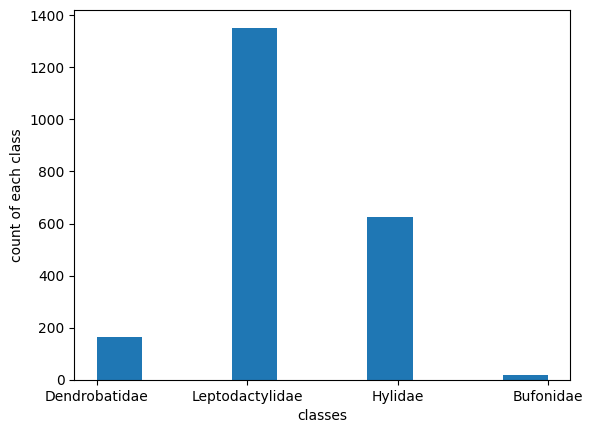

In [9]:
import matplotlib.pyplot as plt

#Visualize Class Counts
plt.hist(y_test)
plt.ylabel("count of each class")
plt.xlabel("classes")
plt.show()

## Training the KNN Classifier model

In [10]:
from KNNClassifier import KNNClassifier

knn = KNNClassifier(k=3)
knn.fit(X_train,y_train)


In [11]:
y_pred = knn.predict(X_test)

In [12]:
from sklearn.metrics import accuracy_score

# Calcola l'accuratezza delle previsioni
accuracy = accuracy_score(y_test, y_pred)
print("Accuratezza:", accuracy)

Accuratezza: 0.9921259842519685


Confusion Matrix:
[[  18    0    1    0]
 [   0  161    3    0]
 [   0    0  617    7]
 [   0    0    6 1346]]


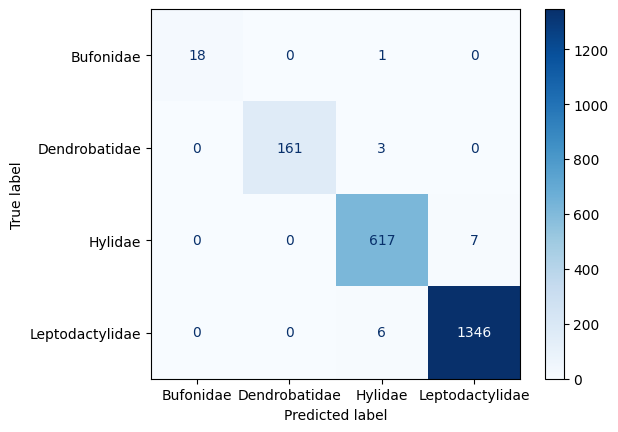

In [15]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y))
disp.plot(cmap='Blues')
plt.show()

In [ ]:
#EVALUATE YOUR PREDICTION
from sklearn import metrics

# Print the precision and recall, among other metrics
print(metrics.classification_report(y_test, y_pred, digits=3))

                 precision    recall  f1-score   support

      Bufonidae      1.000     0.947     0.973        19
  Dendrobatidae      1.000     0.982     0.991       164
        Hylidae      0.984     0.989     0.986       624
Leptodactylidae      0.995     0.996     0.995      1352

       accuracy                          0.992      2159
      macro avg      0.995     0.978     0.986      2159
   weighted avg      0.992     0.992     0.992      2159



## Comparison with Scikit-learn API

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_family_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

# Calcola l'accuratezza delle previsioni
accuracy = accuracy_score(y_test, y_family_pred)
print("Accuratezza:", accuracy)

Accuratezza: 0.9916628068550255


In [ ]:
#EVALUATE YOUR PREDICTION
from sklearn import metrics

# Print the precision and recall, among other metrics
print(metrics.classification_report(y_test, y_family_pred, digits=3))

                 precision    recall  f1-score   support

      Bufonidae      0.947     0.947     0.947        19
  Dendrobatidae      1.000     0.976     0.988       164
        Hylidae      0.984     0.989     0.986       624
Leptodactylidae      0.995     0.996     0.995      1352

       accuracy                          0.992      2159
      macro avg      0.982     0.977     0.979      2159
   weighted avg      0.992     0.992     0.992      2159



## Comparison with Weka tool

![](knn_weka.png)